In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset path
data_folder = r"D:\\target\\ml\\satellite\\Topography_classifier\\archive\\data"

# Define image dimensions and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # Use 20% of the data for validation
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    data_folder,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    data_folder,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Print class indices
print("Class Indices:", train_generator.class_indices)


Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.
Class Indices: {'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the Trinet Model
def build_trinet_model(input_shape, num_classes):
    model = Sequential([
        # Block 1
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        # Block 2
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Block 3
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Fully connected layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build the model
input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
num_classes = len(train_generator.class_indices)

trinet_model = build_trinet_model(input_shape, num_classes)
trinet_model.summary()


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
trinet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history = trinet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)


Epoch 1/50


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 91s 636ms/step - accuracy: 0.6356 - loss: 0.7760 - val_accuracy: 0.8259 - val_loss: 0.4277
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 634ms/step - accuracy: 0.8074 - loss: 0.4677 - val_accuracy: 0.7877 - val_loss: 0.4135
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 628ms/step - accuracy: 0.8458 - loss: 0.3635 - val_accuracy: 0.8242 - val_loss: 0.3767
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 90s 637ms/step - accuracy: 0.8678 - loss: 0.3433 - val_accuracy: 0.7886 - val_loss: 0.4781
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 630ms/step - accuracy: 0.8513 - loss: 0.3490 - val_accuracy: 0.8917 - val_loss: 0.2976
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 635ms/step - accuracy: 0.8742 - loss: 0.3160 - val_accuracy: 0.8863 - val_loss: 0.2663
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 634ms/step - accuracy: 0.8779 - loss: 0.2964 - val_accuracy: 0.8890 - val_loss: 0.2748
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 89s 633ms/step - accuracy: 0.8901 - loss: 0.2904 - val

In [27]:
# Evaluate on validation set
val_loss, val_accuracy = trinet_model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9432 - loss: 0.1334
Validation Loss: 0.15877819061279297
Validation Accuracy: 0.9387211203575134


In [28]:
# Save the model
trinet_model.save("trinet_weather_model.h5")
print("Model saved successfully!")


Model saved successfully!


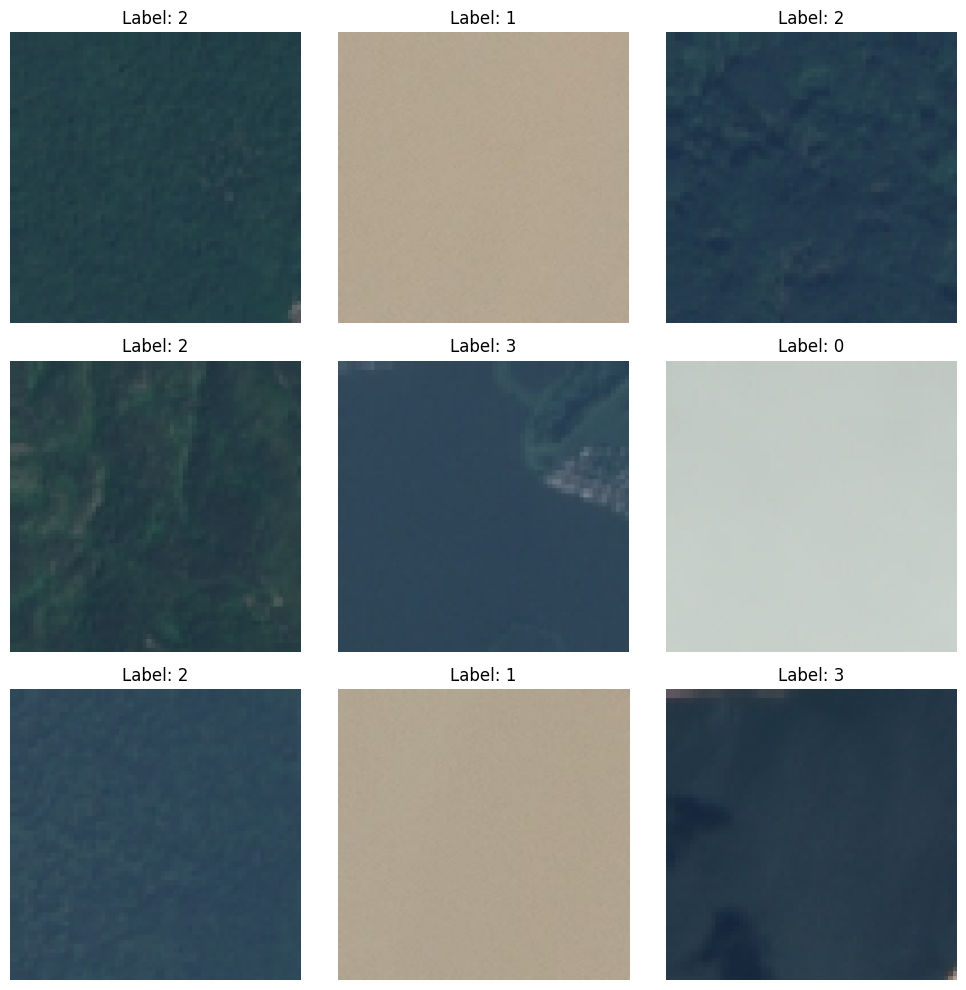

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the train generator
images, labels = next(train_generator)

# Plot the images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for img, label, ax in zip(images, labels, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {np.argmax(label)}")
plt.tight_layout()
plt.show()


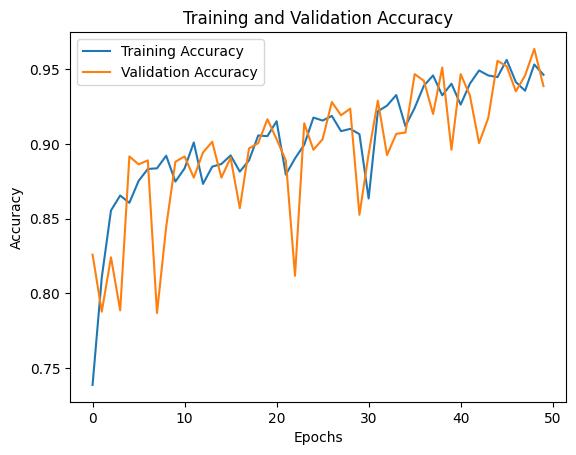

In [30]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


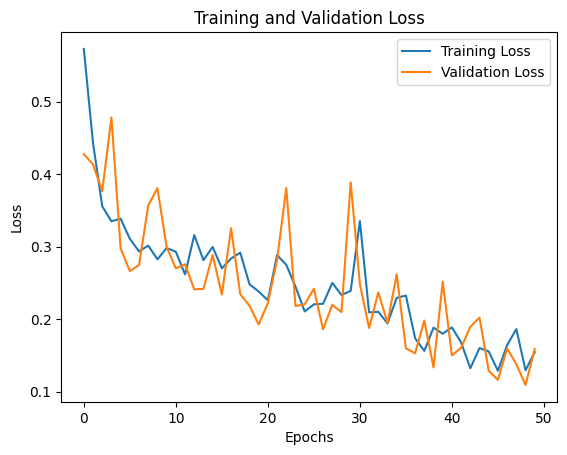

In [31]:
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step


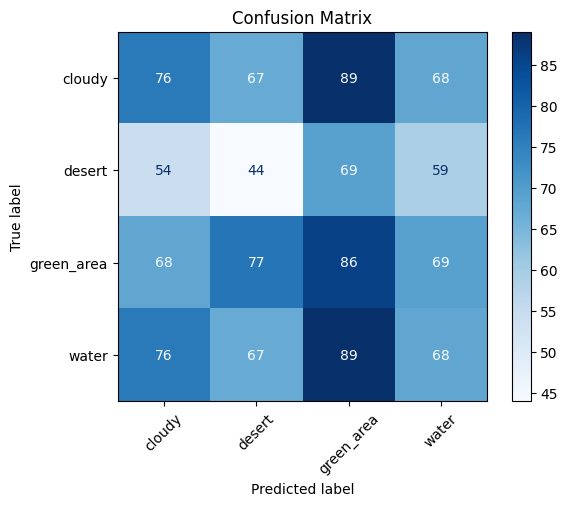

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict on the validation generator
predictions = trinet_model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)  # Predicted classes
y_true = validation_generator.classes    # True classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


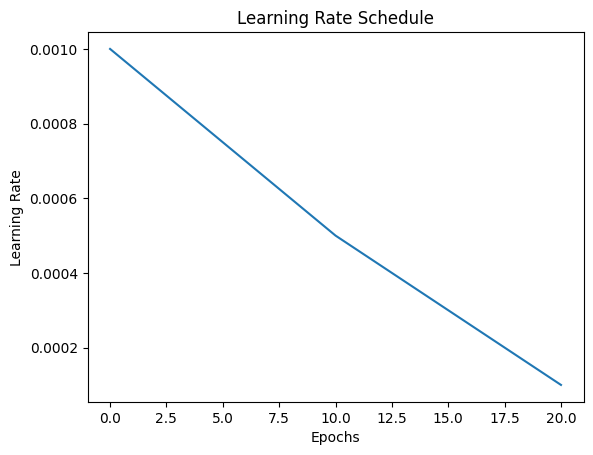

In [33]:
# Example Learning Rate Plot
lrs = [0.001, 0.0005, 0.0001]
epochs = [0, 10, 20]
plt.plot(epochs, lrs)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.show()


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step


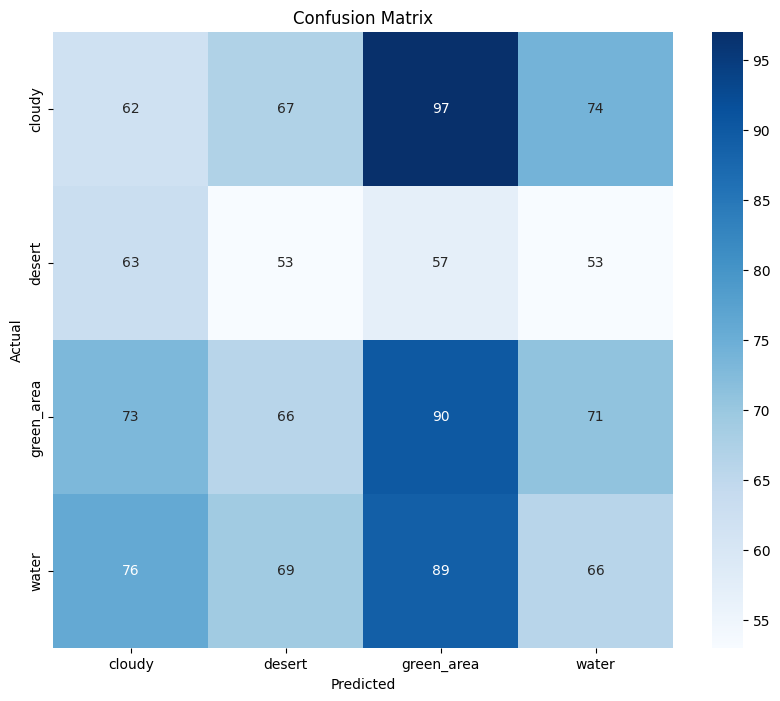

In [36]:
# Generate predictions
Y_pred = trinet_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


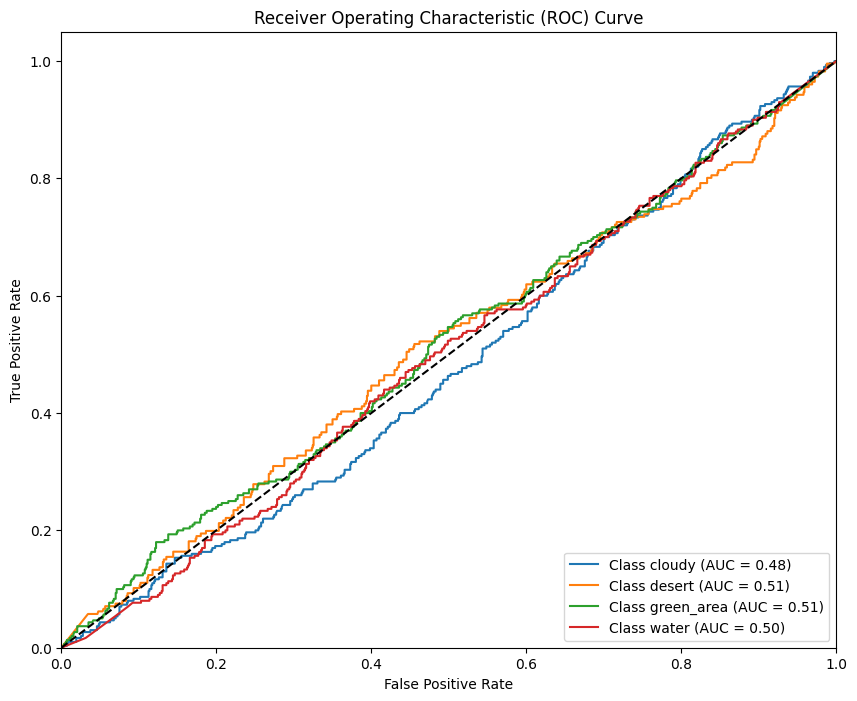

Macro-average AUC: 0.50


In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the true labels
y_true = label_binarize(validation_generator.classes, classes=range(len(validation_generator.class_indices)))

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(validation_generator.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(validation_generator.class_indices)):
    plt.plot(fpr[i], tpr[i], label=f"Class {list(validation_generator.class_indices.keys())[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Macro-average AUC
print(f"Macro-average AUC: {roc_auc_score(y_true, Y_pred, average='macro'):.2f}")


In [38]:
import json

# Save classification report
report = classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys(), output_dict=True)
with open("classification_report.json", "w") as f:
    json.dump(report, f)

# Save confusion matrix
np.save("confusion_matrix.npy", cm)
print("Metrics saved successfully!")


Metrics saved successfully!
